# Shall Personality Attract Your Partner?

In [ ]:
import pandas as pd

In [9]:
dating_data = pd.read_csv("./Speed Dating Data.csv", encoding='ISO-8859-1')

In [11]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [16]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [275]:
data_filterred = dating_data.filter(['gender', 'match', 'attr1_3', 'sinc1_3', 
                                   'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 
                                   'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3',
                                   'sports', 'tvsports', 'excersice', 'dining','museums', 
                                   'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 
                                   'theater', 'movies', 'concerts', 'music', 'shopping', 
                                   'yoga'])
data_filterred = data_filterred.dropna()

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [238]:
data = data_filterred[data_filterred['match']==1]

In [239]:
data.head()

,gender,match,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
3417,0,1,15.0,20.0,15.0,20.0,15.0,15.0,15.0,20.0,...,1.0,7.0,7.0,1.0,9.0,9.0,6.0,10.0,10.0,7.0
3422,0,1,15.0,20.0,15.0,20.0,15.0,15.0,15.0,20.0,...,1.0,7.0,7.0,1.0,9.0,9.0,6.0,10.0,10.0,7.0
3442,0,1,10.0,20.0,30.0,10.0,20.0,10.0,20.0,20.0,...,1.0,1.0,10.0,6.0,8.0,6.0,2.0,9.0,2.0,10.0
3445,0,1,20.0,20.0,20.0,10.0,10.0,20.0,20.0,20.0,...,2.0,8.0,7.0,5.0,9.0,9.0,10.0,10.0,7.0,6.0
3451,0,1,20.0,20.0,20.0,10.0,10.0,20.0,20.0,20.0,...,2.0,8.0,7.0,5.0,9.0,9.0,10.0,10.0,7.0,6.0


In [240]:
data_female = data[data['gender']==0]
data_male = data[data['gender']==1]

In [241]:
stats_male = np.array(data_male[['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']].mean())
stats_female = np.array(data_female[['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']].mean())

labels=np.array(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitous', 'Interest'])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats_male=np.concatenate((stats_male,[stats_male[0]]))
stats_female=np.concatenate((stats_female,[stats_female[0]]))
angles=np.concatenate((angles,[angles[0]]))

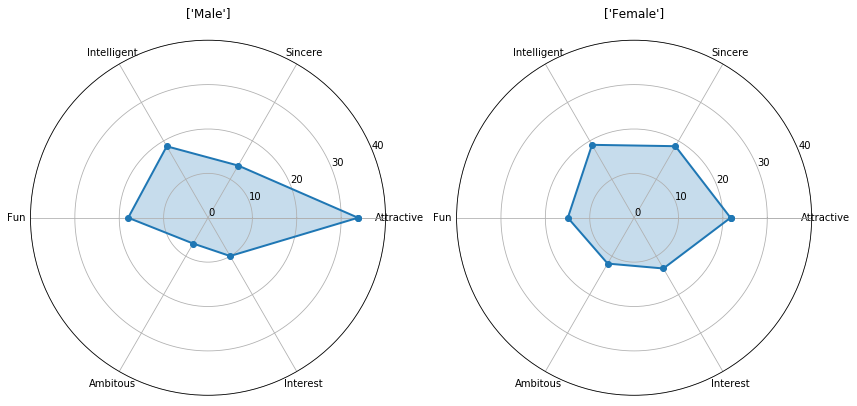

In [242]:
f, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(14,14))

ax1.plot(angles, stats_male, 'o-', linewidth=2)
ax1.fill(angles, stats_male, alpha=0.25)
ax1.set_thetagrids(angles * 180/np.pi, labels)
ax1.set_yticks(range(0, 50, 10))
ax1.set_title(['Male'])
ax1.grid(True)

ax2.plot(angles, stats_female, 'o-', linewidth=2)
ax2.fill(angles, stats_female, alpha=0.25)
ax2.set_thetagrids(angles * 180/np.pi, labels)
ax2.set_yticks(range(0, 50, 10))
ax2.set_title(['Female'])
ax2.grid(True)

In [243]:
from sklearn.model_selection import train_test_split

In [276]:
X = data_filterred.drop(columns=['gender', 'match'])
y = data_filterred['match']

In [278]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 3408 to 8377
Data columns (total 28 columns):
attr1_3     2016 non-null float64
sinc1_3     2016 non-null float64
intel1_3    2016 non-null float64
fun1_3      2016 non-null float64
amb1_3      2016 non-null float64
shar1_3     2016 non-null float64
attr7_3     2016 non-null float64
sinc7_3     2016 non-null float64
intel7_3    2016 non-null float64
fun7_3      2016 non-null float64
amb7_3      2016 non-null float64
shar7_3     2016 non-null float64
sports      2016 non-null float64
tvsports    2016 non-null float64
dining      2016 non-null float64
museums     2016 non-null float64
art         2016 non-null float64
hiking      2016 non-null float64
gaming      2016 non-null float64
clubbing    2016 non-null float64
reading     2016 non-null float64
tv          2016 non-null float64
theater     2016 non-null float64
movies      2016 non-null float64
concerts    2016 non-null float64
music       2016 non-null float64
shoppi

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [264]:
from sklearn.linear_model import LogisticRegression

In [279]:
model = LogisticRegression()

In [280]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [281]:
prediction = model.predict(X_test)

In [282]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [283]:
confusion_matrix(y_test, prediction)

array([[490,   0],
       [115,   0]])

In [284]:
report = classification_report(y_test, prediction)
print(report)

             precision    recall  f1-score   support

          0       0.81      1.00      0.89       490
          1       0.00      0.00      0.00       115

avg / total       0.66      0.81      0.72       605



/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [307]:
dating_data_full = dating_data[['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 
                   'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 
                   'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o', 
                   'age', 'field', 'race', 'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 
                   'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 
                   'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 
                   'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 
                   'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 
                   'like', 'prob', 'met']]


In [301]:
dating_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 67 columns):
iid         8378 non-null int64
gender      8378 non-null int64
pid         8368 non-null float64
match       8378 non-null int64
int_corr    8220 non-null float64
samerace    8378 non-null int64
age_o       8274 non-null float64
race_o      8305 non-null float64
pf_o_att    8289 non-null float64
pf_o_sin    8289 non-null float64
pf_o_int    8289 non-null float64
pf_o_fun    8280 non-null float64
pf_o_amb    8271 non-null float64
pf_o_sha    8249 non-null float64
dec_o       8378 non-null int64
attr_o      8166 non-null float64
sinc_o      8091 non-null float64
intel_o     8072 non-null float64
fun_o       8018 non-null float64
like_o      8128 non-null float64
prob_o      8060 non-null float64
met_o       7993 non-null float64
age         8283 non-null float64
field       8315 non-null object
race        8315 non-null float64
imprace     8299 non-null float64
imprelig    8299 non

In [308]:
dating_data_full = dating_data_full.drop(['field', 'career', 'from'], axis=1)

In [309]:
dating_data_full = dating_data_full.dropna()

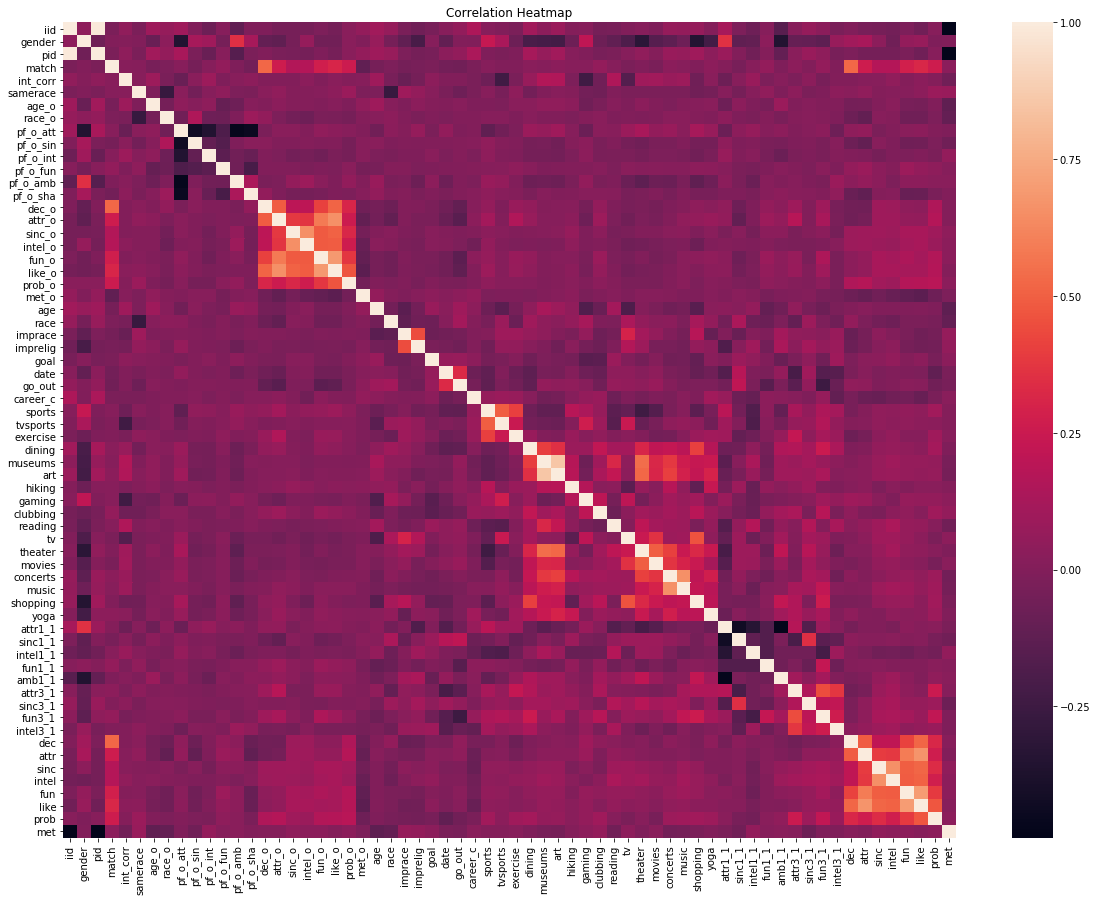

In [313]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dating_data_full.corr()
corr
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)